*Task 1*

Import Libraries


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


Load dataset

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data Check

In [4]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Exploratory Data Analysis (EDA)

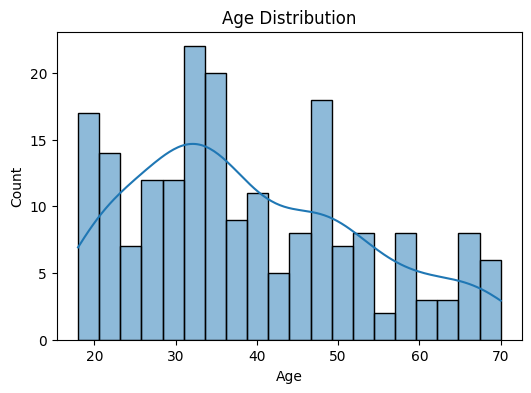

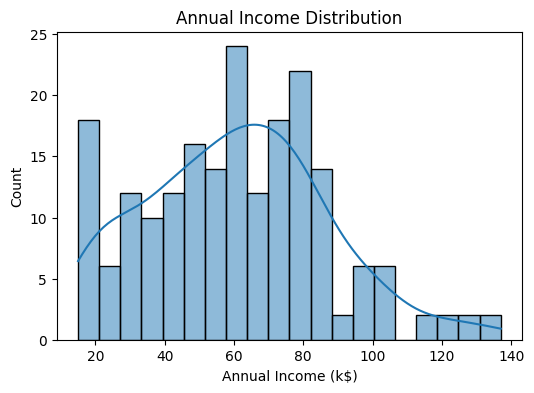

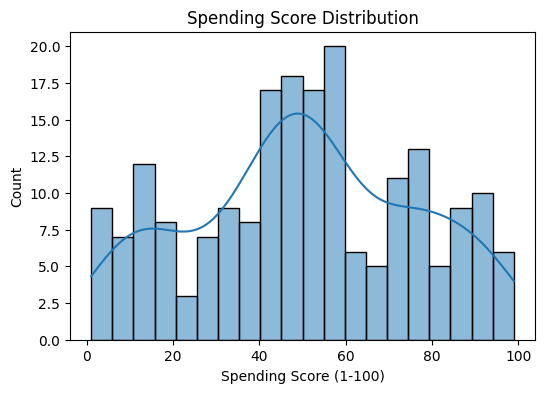

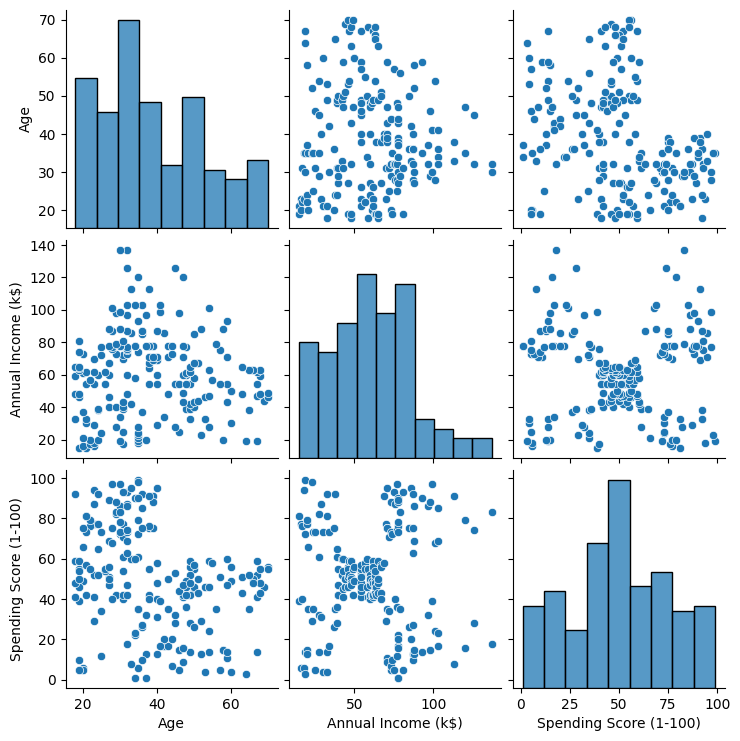

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Annual Income Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Spending Score Distribution')
plt.show()

sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


Elbow Method

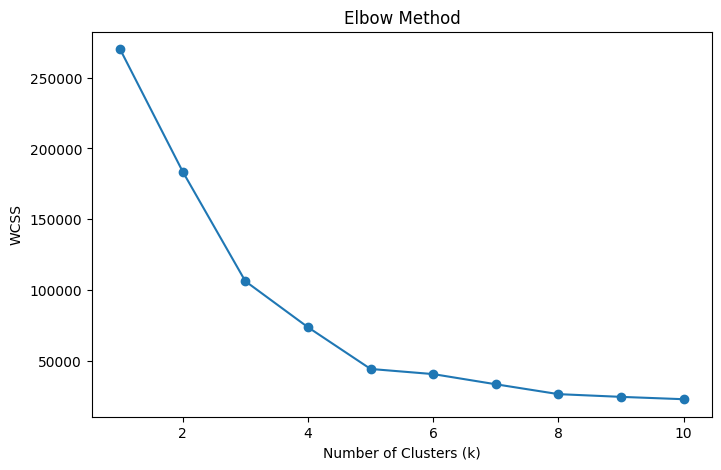

In [10]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


Apply KMeans

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


Visualize the Final Clusters

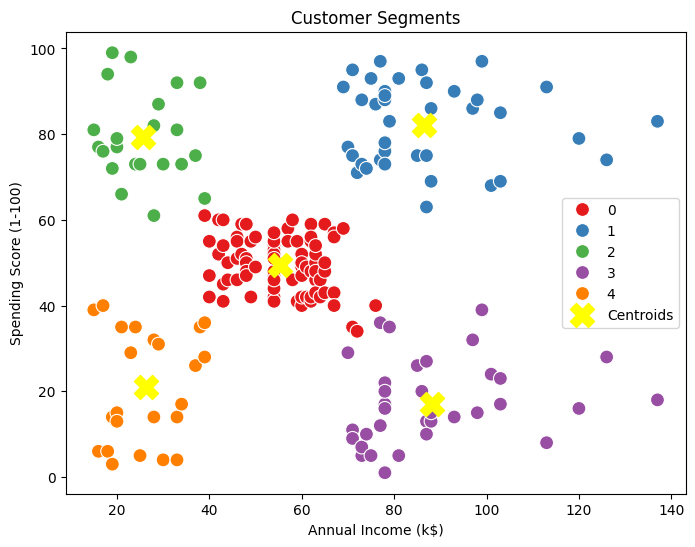

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='Set1', s=100)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='X')

plt.title('Customer Segments')
plt.legend()
plt.show()


*Task 2*

Load data

In [13]:
ratings = pd.read_csv('u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])

movies = pd.read_csv('u.item', sep='|', encoding='latin-1', header=None, usecols=[0, 1] + list(range(5, 24)))
movies.columns = ['movie_id', 'title'] + [f'genre_{i}' for i in range(19)]



Preprocess

In [14]:
movie_stats = ratings.groupby('movie_id').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['avg_rating', 'rating_count']
movie_stats.reset_index(inplace=True)

movie_data = pd.merge(movies, movie_stats, on='movie_id')


Feature Engineering



In [17]:
features = movie_data.drop(columns=['movie_id', 'title'])  # Keep only numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


K-Means Clustering

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

movie_data['Cluster'] = clusters


Visualize Clusters using PCA



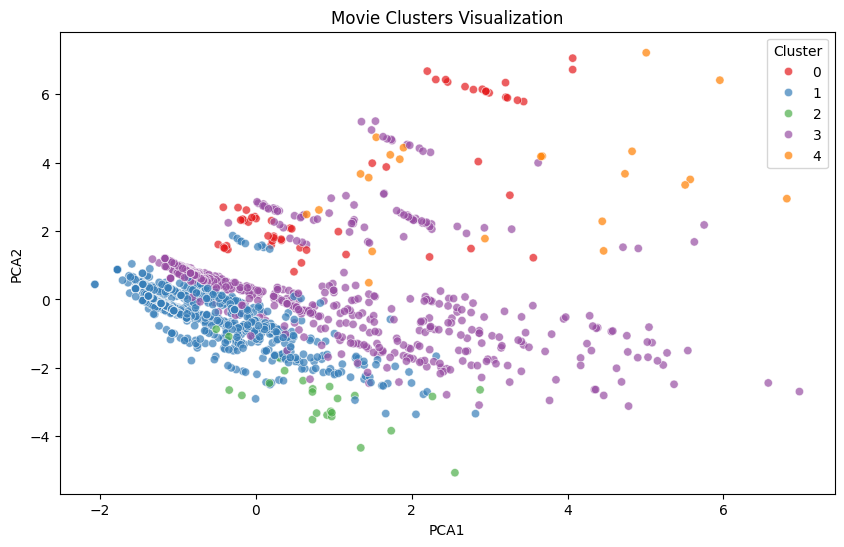

In [19]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

movie_data['PCA1'] = reduced[:, 0]
movie_data['PCA2'] = reduced[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=movie_data, palette='Set1', alpha=0.7)
plt.title('Movie Clusters Visualization')
plt.show()


Interpret Results

In [20]:
for i in range(5):
    print(f"\nCluster {i} sample movies:")
    print(movie_data[movie_data['Cluster'] == i][['title', 'avg_rating', 'rating_count']].head(5))



Cluster 0 sample movies:
                                     title  avg_rating  rating_count
20           Muppet Treasure Island (1996)    2.761905            84
70                   Lion King, The (1994)    3.781818           220
90  Nightmare Before Christmas, The (1993)    3.587413           143
94                          Aladdin (1992)    3.812785           219
98  Snow White and the Seven Dwarfs (1937)    3.709302           172

Cluster 1 sample movies:
                                               title  avg_rating  rating_count
2                                  Four Rooms (1995)    3.033333            90
4                                     Copycat (1995)    3.302326            86
5  Shanghai Triad (Yao a yao yao dao waipo qiao) ...    3.576923            26
6                              Twelve Monkeys (1995)    3.798469           392
8                            Dead Man Walking (1995)    3.896321           299

Cluster 2 sample movies:
                          title  a



---

